In [1]:
%pylab inline
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA

plt.style.use ('seaborn-colorblind')

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

Populating the interactive namespace from numpy and matplotlib


# Andrews Curves

D. F. Andrews introduced 'Andrews Curves' in his 1972 [paper](https://www.jstor.org/stable/2528964) for plotthing high dimensional data in two dimeion. The underlying principle is simple: Embed the high dimensiona data in  high diemnsion only using a space of functions and then visualizing these functions.

Consider A $d$ dimensional data point $\mathbf{x} = (x_1, x_2, \dots, x_d)$. Define the following function:
$$f_x(t) = \begin{cases}
\frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin (2t) + x_5\cos(2t) + \dots + x_{2k} \sin(kt) + x_{2k+1} \cos(kt) + \dots + x_{d-2}\sin( (\frac{d}{2} -1)t) + x_{d-1}\cos( (\frac{d}{2} -1)t) + x_{d} \sin(\frac{d}{2}t)   & d \text{ even}\\
\frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin (2t) + x_5\cos(2t) + \dots + x_{2k} \sin(kt) + x_{2k+1} \cos(kt) + \dots + x_{d-3}\sin( \frac{d-3}{2} t) + x_{d-2}\cos( \frac{d-3}{2}t) + x_{d-1} \sin(\frac{d-1}{2}t) + x_{d} \cos(\frac{d-1}{2}t)) & d \text{ odd}\\
\end{cases}
$$

This representation yields one dimensional projections, which may reveal clustering, outliers or orther patterns that occur in this subspace. All such one dimensional projections can then be plotted on one graph.

# Properties

Andrews Curves has some intersting properties that makes it useful as a 2D tool:


## Mean

If $\bar{\mathbf{x}}$ represents the mean of $\bar{x}$ for $n$ observations: $\bar{\mathbf{x}}  = \frac{1}{n} \mathbf{x_i}$. then,
$$ f_{\bar{\mathbf{x}}}(t) = \frac{1}{n} \sum_{i=1}{n} f_{\mathbf{x_i}}(t)$$

Proof: 
We consider an odd $d$. 
\begin{align*}
f_{\bar{\mathbf{x}}}(t) &= \frac{\bar{\mathbf{x_1}}}{\sqrt{2}} +  \bar{\mathbf{x_2}} \sin(t) + \bar{\mathbf{x_3}} \cos(t) + \bar{\mathbf{x_4}} \sin(2t) + \bar{\mathbf{x_5}} \cos(2t) + \dots +  \bar{\mathbf{x_d}} \sin(\frac{d}{2}t) \\
&= \frac{\sum_{j=1}^n x_{1j}}{\sqrt{2}} + \frac{\sum_{j=1}x_{2j}}{n} \sin(t) + \frac{\sum_{j=1}x_{3j}}{n} \cos(t) + \frac{\sum_{j=1}x_{4j}}{n}\sin(2t) + \frac{\sum_{j=1}x_{5j}}{n}\cos(2t) + \dots + \frac{\sum_{j=1}x_{dj}}{n} \sin(\frac{d}{2}t)\\
&= \frac{1}{n} \sum_{i=1}^n f_{x_i} (t)
\end{align*}

## Distance

Euclidean distance is preserved. Consider two points $\mathbf{x}$ and $\mathbf{y}$

$$||\mathbf{x} - \mathbf{y}||_2^2 = \sum_{j=1}^d |x_j-y_j|^2$$

Let's consider $||f_{\mathbf{x}}(t) - f_{\mathbf{y}}(t) ||_2^2 = \int_{-\pi}^{\pi} (f_{\mathbf{x}}(t) - f_{\mathbf{y}}(t))^2 dt $

\begin{align*}
\int_{-\pi}^{\pi} (f_{\mathbf{x}}(t) - f_{\mathbf{y}}(t))^2 dt &= \frac{(x_1-y_1)^2}{2}(2\pi) + \int_{-\pi}^{\pi} (x_1-y_1)^2 \sin^2{t}\ dt + \int_{-\pi}^{\pi} (x_2-y_2)^2 \cos^2{t}\ dt + \int_{-\pi}^{\pi} (x_3-y_3)^2 \sin^2{2t}\ dt + \int_{-\pi}^{\pi} (x_4-y_4)^2 \cos^2{2t}\ dt +  \dots
\end{align*}

\begin{align*} 
\int^{\pi}_{-\pi} \sin^2 (kt) dt &= \frac{1}{k}\int_{-k\pi}^{k\pi} \sin^2 (t') dt'\\
&= \frac{1}{k} \left( \frac{\int_{-k\pi}^{k\pi} (1-\cos{(2t'))}dt'}{2} \right)\\
&= \frac{1}{k} \frac{2k\pi}{2}\\
&= \pi\\
\int^{\pi}_{-\pi} \cos^2 (kt) dt &= \int^{\pi}_{-\pi} (1-\sin^2 (kt)) dt\\
&= 2\pi-\pi\\
&= \pi
\end{align*}

Thus,

\begin{align*}
\int_{-\pi}^{\pi} (f_{\mathbf{x}}(t) - f_{\mathbf{y}}(t))^2 dt &= \pi ||\mathbf{x} - \mathbf{y}||_2^2
\end{align*}

## Variance

If the $d$ features/components are all indepdent and have a common variance $\sigma^2$

Then
\begin{align*}
\text{Var}f_{\mathbf{x}(t)} &= \text{Var} \left(\frac{x_1}{\sqrt{2}} + x_2 \sin(t) + x_3 \cos(t) + x_4 \sin (2t) + x_5\cos(2t) + \dots + x_{2k} \sin(kt) + x_{2k+1} \cos(kt) + \dots + x_{d-2}\sin( (\frac{d}{2} -1)t) + x_{d-1}\cos( (\frac{d}{2} -1)t) + x_{d} \sin(\frac{d}{2}t)  \right)\\
&= \sigma^2 \left( \frac{1}{2} + \sin^2 + \cos^2 t + \sin^2 2t + \cos^2 2t + \dots \right)\\
&= \begin{cases}
\sigma^2(\frac{1}{2} + \frac{k-1}{2}) & d \text{ odd }\\
\sigma^2(\frac{1}{2} + \frac{k}{2} - 1 + \sin^2 {\frac{kt}{2}} ) & d  \text{ even }\\
\end{cases}\\
&= \begin{cases}
\frac{k\sigma^2}{2} & d \text{ odd }\\
\sigma^2(\frac{k-1}{2} + \sin^2 {\frac{kt}{2}} ) & d  \text{ even }\\
\end{cases}
\end{align*}

In the even case the variance is boundded between $[\sigma^2(\frac{k-1}{2}), \sigma^2(\frac{k+1}{2})]$
Since the variance is indepedent of $t$, the plotted functions will be smooth!



# Interpretation

## Clustering

Functions close together, forming a band imply the corresponding points are also close in the euclidean space

## Test of significance at particular values of $t$

To test $f_{\mathbf{x}}(t) = f_{\mathbf{y}}(t)$ for some hypothesize $\mathbf{y}$ and assuming the $\text{Var}[f_{\mathbf{x}}(t)]$ is known  then testing can be done using the usual $z$ score:
$$
z = \frac{f_{\mathbf{x}}(t)-f_{\mathbf{y}}(t)}{(\text{Var}[{f_{\mathbf{x}}(t)}])^{\frac{1}{2}}}
$$

assuming that the comoponets $x_i$ are independent normal random variables.

## Detecting outliers

If comonents $x_i$ are independent normal $ x_i \sim \mathcal{N}(\mu_i, \sigma^2)$, then $\frac{|\mathbf{x}-\mathbf{\mu}}{\sigma^2}$ follows a $\chi^2_d$ distirbution.
Consider a vector $v = \frac{f_\mathbf{1}(t)}{||f_\mathbf{1}(t)||}$ then : 

\begin{align*}
|(\mathbf{x}-\mathbf{\mu})'v|^2 &=  \frac{||f_{\mathbf{x}}(t) - f_{\mathbf{\mu}}(t)||^2 }{||f_\mathbf{1}(t)||^2}
 \frac{||f_{\mathbf{x}}(t) - f_{\mathbf{\mu}}(t)||^2 }{||f_\mathbf{1}(t)||^2} &\leq \chi_d^2(\alpha)
\end{align*}

Now, 
\begin{align*}
||f_\mathbf{1}(t)||^2 &= \frac{1}{2} + \sin^2 + \cos^2 t + \dots + \\
&\leq \frac{d+1}{2}
\end{align*}

Thus,

\begin{align*}
||f_{\mathbf{x}}(t) - f_{\mathbf{\mu}}(t)||^2 \leq \sigma^2 ||f_\mathbf{1}(t)||^2 \chi^2_d(\alpha) &\leq \sigma^2 \frac{d+1}{2} \chi^2_d(\alpha)\\
\end{align*}


## Linear relationships

The "Sandwich" theorem: If $\mathbf{y}$ lies on a line joining $\mathbf{x}$ and $\mathbf{z}$, then $\forall t$ : $f_\mathbf{y}(t)$ lies between $f_\mathbf{x}(t)$ and $f_\mathbf{z}(t)$. This is straightforward.


In [2]:
def andrews_curves(data, granularity=1000):
    """
    Parameters
    -----------
    data : array like
           ith row is the ith observation
           jth column is the jth feature
           Size (m, n) => m replicats with n features
    granularity : int
                  linspace granularity for theta
    Returns
    -------
    matrix : array
             Size (m, granularity) => 
             
    """
    n_obs, n_features = data.shape
    theta = np.linspace(-np.pi, np.pi, granularity)
    # transpose
    theta = np.reshape(theta, (-1, theta.shape[0]))
    t = np.arange(1, np.floor(n_features/2)+1)
    t = np.reshape(t, (t.shape[0], 1))
    sin_bases = np.sin(t*theta)
    cos_bases = np.cos(t*theta)
    if n_features % 2 == 0:      
        # Remove the last row of cosine bases
        # for even values
        cos_bases = cos_bases[:-1,:]
    c = np.empty((sin_bases.shape[0] + cos_bases.shape[0], sin_bases.shape[1] ), 
                 dtype=sin_bases.dtype)
    c[0::2,:] = sin_bases
    c[1::2,:] = cos_bases
    constant = 1/np.sqrt(2) * np.ones((1, c.shape[1]))
    matrix = np.vstack([constant, c])
    return (np.dot(data,matrix))


# Andrews Curves for iris dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')
df_grouped = df.groupby('Name')

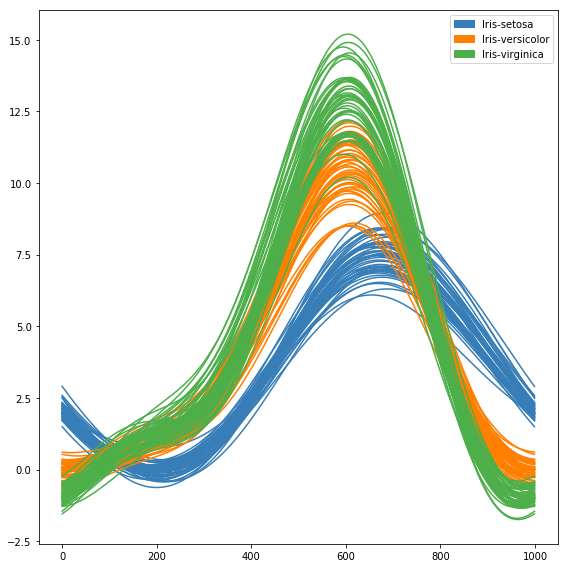

In [4]:
df_setosa = df.query("Name=='Iris-setosa'")
fig, ax = plt.subplots(figsize=(8,8))


index = 0 
patches = []
for key, group in df_grouped:
    group = group.drop('Name', axis=1)
    for row in andrews_curves(group.as_matrix()):
        plot = ax.plot(row, CB_color_cycle[index])
    patch = mpatches.Patch(color=CB_color_cycle[index], label=key)
    
    index +=1

    patches.append(patch)
ax.legend(handles=patches)
fig.tight_layout()

# PCA

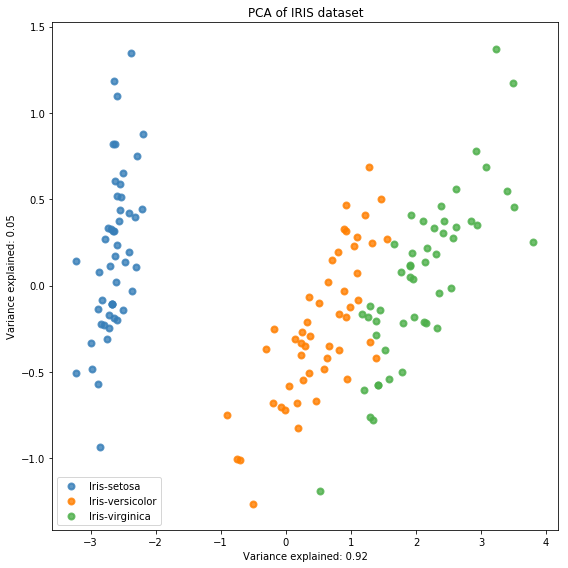

In [5]:

X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = df['Name'].astype('category').cat.codes
target_names = df['Name'].astype('category').unique()

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

fig, ax = plt.subplots(figsize=(8,8))
colors = CB_color_cycle[:3]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_xlabel('Variance explained: {:.2f}'.format(pca.explained_variance_ratio_[0]))
ax.set_ylabel('Variance explained: {:.2f}'.format(pca.explained_variance_ratio_[1]))
ax.set_title('PCA of IRIS dataset')
fig.tight_layout()

Clearly setos and virginica lie close to each other and hence appear as merged clusters in PCA and merged bands in Andrews Curves